## Pre-Processing and Modeling of Online Shoppers Intention Dataset

### Lisa Patel

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV



In [2]:
df = pd.read_csv('EDA_df.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Text(0.5, 1.0, 'Entries per Month')

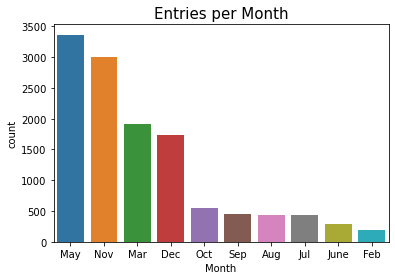

In [5]:
months = df['Month'].value_counts()

sns.countplot(x = df['Month'], order=months.index)
plt.title('Entries per Month', fontsize=15)

In [6]:
df.replace(['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12], inplace = True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


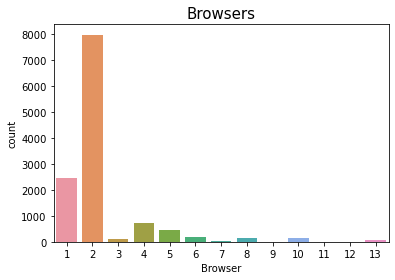

In [7]:
sns.countplot(x = df['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

There is a large majority of users using brower 2 with a smaller number using browser 1. All other browsers only have a small subsection of users. It makes sense to drop this column since it is polarizing and doesn't contribute much to our model. 

In [8]:
df.replace(['Returning_Visitor', 'New_Visitor', 'Other'], [1 ,2, 3], inplace = True)

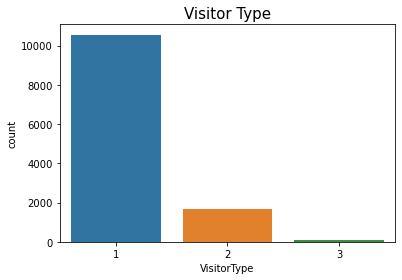

In [9]:
sns.countplot(x = df['VisitorType'])
plt.title('Visitor Type', fontsize=15)
plt.show()

The visitor type column was transformed into a numerical column for the machine learning algorithm. The data is severely skewed towards returning customers, which may affect a models performance. 


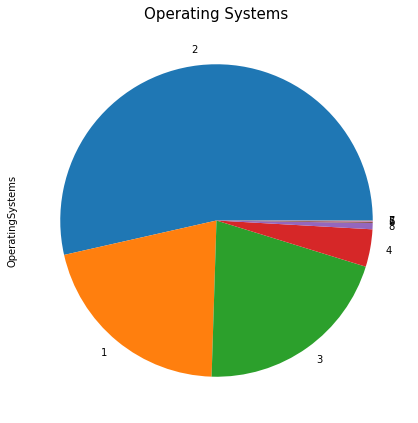

In [10]:
df['OperatingSystems'] = df['OperatingSystems'].replace(['5,6,7,8'],5)
os_plot = df['OperatingSystems'].value_counts().plot.pie(figsize=(7,8))
plt.title('Operating Systems', fontsize=15)
plt.show()

Browsers with low level of users have been consolidated under category 5. A user's operating system for this classification problem does not seem appropriate since it most likely indicates user's having a certain type of computer. Therefore, we will leave this out of the model. 

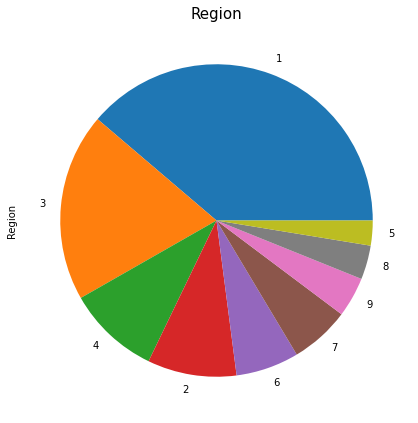

In [11]:
os_plot = df['Region'].value_counts().plot.pie(figsize=(7,8))
plt.title('Region', fontsize=15)
plt.show()

We leave regionality out because the regionality may be slightly tied to purchase likelihood, but we want to train our model on a smaller set of features if possible.

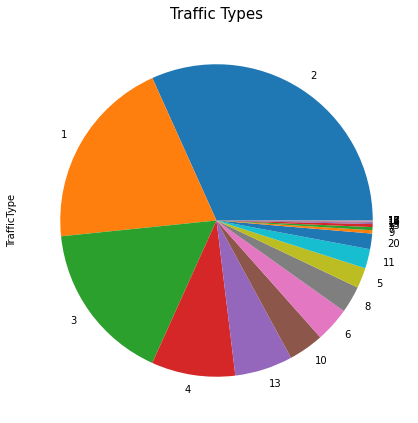

In [12]:
os_plot = df['TrafficType'].value_counts().plot.pie(figsize=(7,8))
plt.title('Traffic Types', fontsize=15)
plt.show()

We will leave this feature out of the model as well since traffic sources are typically not useful for classifying if a user made a purchase. It's typically important for tracking website traffic to determine whether and where to advertise.

In [13]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

### Dropping Columns

In [14]:
df_clean = df.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend', 'Administrative', 'Administrative_Duration','Informational','Informational_Duration','OperatingSystems'], axis=1)

### One-hot Encoding and Splitting the Data

In [15]:
encoded_visitor = pd.get_dummies(df_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

clean_merged_df = pd.concat([df_clean, encoded_visitor], axis=1).drop(['VisitorType'], axis=1)

In [16]:
clean_merged_df[['Visitor_Type_2', 'Visitor_Type_3']].value_counts()

Visitor_Type_2  Visitor_Type_3
0               0                 10551
1               0                  1694
0               1                    85
dtype: int64

In [17]:
y = clean_merged_df['Revenue']
X = clean_merged_df.drop('Revenue', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42, test_size=.25)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


At this point, we further examined the usefulness of certain features related to this classification problem and either removed unnessecary one or transformed them into more suitable ones. The dataset was then encoded with one-hot encoding since it made the most sense and split into the appropriate 75/25 train/test sets. 

The next task will be to explore various classification machine learning models. 

In [18]:
print(np.shape(y_train))
print(np.shape(X_test_scaled))

(9247,)
(3083, 8)


### Logistic Regression

Let's started off the modeling with a simple logistic regression model since it's a binary classification problem. 

In [19]:
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred=log_reg.predict(X_test_scaled)

print("Basic Logistic Regression model recall:", round(metrics.recall_score(y_test, y_pred)*100,2))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test, y_pred))

Basic Logistic Regression model recall: 35.64
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2606
        True       0.73      0.36      0.48       477

    accuracy                           0.88      3083
   macro avg       0.81      0.67      0.71      3083
weighted avg       0.87      0.88      0.86      3083

col_0    False  True 
Revenue              
False     2544     62
True       307    170


Imediately the main problem can be seen from the precision and recall scores. Typically, prediction accuracy is the most common metric for classification tasks, but it becomes inappropriate and misleading when it is used on an imbalanced data set, which we have in this case. 

When your dataset do not represent all classes of data equally, the model might overfit to the class that’s represented more in your dataset and become oblivious to the existence of the minority class since the algrorithm decides to classify everything in the majority class to get a good accuracy score. The model may naively look good, but in practice has no skills. So, an alternate performance metrics must be used. For imbalanced datasets, the recall score and precision are much better metrics. 

In the logistic regression model, we see that recall for the true label is significantly lower compared to others. 308 true cases have been misclassified as false, so that's concerning. Lets continue to explore other models and compare afterwards. 

In [20]:
#Precision =# True positives / # predicted positive = TP/(TP+FP)
#Recall = # True positives / # positives = TP / (TP+FN)

In [21]:
def feature_importances(model):
    importance = model.coef_[0]
    important_features=[]
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature:',df.columns[i],'Score:', v)
        if (v>0.04 or v<-0.04):
            important_features.append(df.columns[i])
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.title('Feature Importance for {}'.format(model))
    plt.show()
    return important_features

Feature: Administrative Score: 0.19489857326067062
Feature: Administrative_Duration Score: 0.08032258805021615
Feature: Informational Score: -0.10667535798125784
Feature: Informational_Duration Score: -0.8435644400865993
Feature: ProductRelated Score: 1.5370878575599787
Feature: ProductRelated_Duration Score: -0.21422939725185708
Feature: BounceRates Score: 0.09467939510871413
Feature: ExitRates Score: -0.03565761021281973


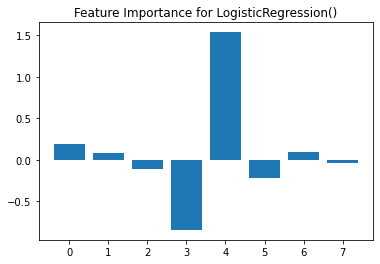

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates']

In [22]:
feature_importances(log_reg)


In [23]:
df['PageValues'].describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

Sci-Kit Learn classifiers can give heavier weights to the minority class using a simple parameter during model initiation. Let's see how that will improve our results.

In [24]:
log_reg_bal= LogisticRegression(class_weight = 'balanced')
log_reg_bal.fit(X_train_scaled, y_train)
y_pred=log_reg_bal.predict(X_test_scaled)

print("Basic Logistic Regression model recall:", round(metrics.recall_score(y_test, y_pred)*100,2))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test, y_pred))

Basic Logistic Regression model recall: 68.34
              precision    recall  f1-score   support

       False       0.94      0.89      0.92      2606
        True       0.54      0.68      0.61       477

    accuracy                           0.86      3083
   macro avg       0.74      0.79      0.76      3083
weighted avg       0.88      0.86      0.87      3083

col_0    False  True 
Revenue              
False     2332    274
True       151    326


The recall score for positive labels improved from 35% to 69%, which is a good result. Even though there were more false positive with the balanced logistic regression, the f1 score for negative labels being 92% still indicates this is a better model. 

Lets look at the feature importances. 

Feature: Administrative Score: 0.2728776005044198
Feature: Administrative_Duration Score: 0.14947177359687086
Feature: Informational Score: -0.09041231871566069
Feature: Informational_Duration Score: -0.6550851112489039
Feature: ProductRelated Score: 2.21229590893485
Feature: ProductRelated_Duration Score: -0.28649483723607594
Feature: BounceRates Score: 0.11649145058676816
Feature: ExitRates Score: -0.006448377088902264


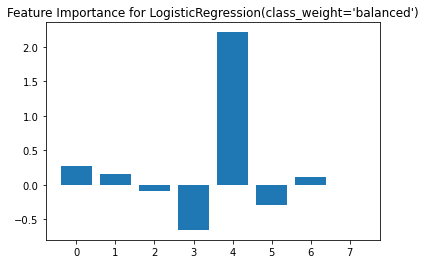

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates']

In [25]:
feature_importances(log_reg_bal)


Again, page values plays a significant part in our model.

### Gaussian Naive Bayes Classifier

In [26]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb = GaussianNB() 
gnb.fit(X_train_scaled, y_train) 

# Make prediction using our test data and model
y_pred = gnb.predict(X_test_scaled) 

# Comparing our prediction to response values
print("Gaussian Naive Bayes model accuracy:", round(metrics.accuracy_score(y_test, y_pred)*100,2))
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

Gaussian Naive Bayes model accuracy: 77.2
              precision    recall  f1-score   support

       False       0.93      0.79      0.85      2606
        True       0.37      0.69      0.48       477

    accuracy                           0.77      3083
   macro avg       0.65      0.74      0.67      3083
weighted avg       0.85      0.77      0.80      3083

col_0    False  True 
Revenue              
False     2053    553
True       150    327


So the Gaussian Naive Bayes Classifies did better in terms of recall since it classified more true cases as true. However, it also has worse precision. 510 false cases misclassified as true. 

### Random Forest Classifier

In [27]:
# Fit Random Forest Classifier to the Training Data
rfc = RandomForestClassifier(max_depth=5, random_state=4, n_estimators=40)
rfc.fit(X_train_scaled, y_train)

# make prediction using the test data and model
y_pred_rfc = rfc.predict(X_test_scaled)
y_prob_rfc = rfc.predict_proba(X_test_scaled)[:, 1]

# Comparing the prediciton to response values
print('Random Forest Classifier model recall(in %):', round(metrics.recall_score(y_test, y_pred_rfc)*100,2))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred_rfc))

Random Forest Classifier model recall(in %): 40.04
              precision    recall  f1-score   support

       False       0.93      0.79      0.85      2606
        True       0.37      0.69      0.48       477

    accuracy                           0.77      3083
   macro avg       0.65      0.74      0.67      3083
weighted avg       0.85      0.77      0.80      3083

col_0    False  True 
Revenue              
False     2550     56
True       286    191


This model's results resemble the previous one. However, fewer false cases were misclassified compared to GNB. We can try to optimize this classifier to see if anything interesting occurs. 

In [29]:
# Lets Optimize the Random Forest Classifier using GridSearch
param_grid = {
    'n_estimators' : [80, 100],
    'max_depth' : [10, 15],
    'min_samples_leaf' : [2,3],
    'min_samples_split': [2,4]
}

gridsearch = GridSearchCV(estimator=rfc,param_grid=param_grid,verbose = 1)
gridsearch.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=RandomForestClassifier(max_depth=5, n_estimators=40,
                                              random_state=4),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [80, 100]},
             verbose=1)

In [30]:
gridsearch.best_params_

{'max_depth': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [31]:
rfc_opt = RandomForestClassifier(n_estimators = 100,max_depth = 15,min_samples_leaf = 3, min_samples_split = 2,random_state = 42)
rfc_opt.fit(X_train_scaled,y_train)
rfc_opt_pred = rfc_opt.predict(X_test_scaled)
print(classification_report(y_test,rfc_opt_pred))

print('Random Forest Classifier model recall(in %):', round(metrics.recall_score(y_test, rfc_opt_pred)*100,2))
print(pd.crosstab(y_test,rfc_opt_pred))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2606
        True       0.73      0.51      0.60       477

    accuracy                           0.89      3083
   macro avg       0.82      0.74      0.77      3083
weighted avg       0.89      0.89      0.89      3083

Random Forest Classifier model recall(in %): 51.15
col_0    False  True 
Revenue              
False     2514     92
True       233    244


In [32]:
rfc.feature_importances_

array([0.06324326, 0.06525683, 0.04718309, 0.08569011, 0.71117446,
       0.00818764, 0.01846279, 0.00080182])

<BarContainer object of 8 artists>

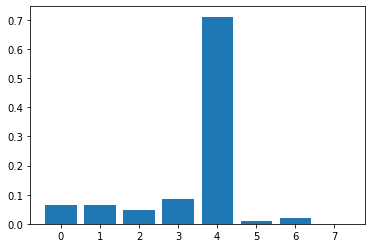

In [33]:
plt.bar([x for x in range(len(rfc.feature_importances_))], rfc.feature_importances_)

The area under the ROC curve is: 0.88


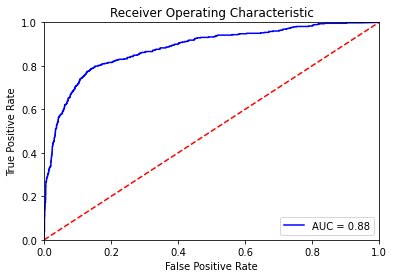

In [34]:
# Creating an ROC 

y_prob_rfc = rfc_opt.predict_proba(X_test_scaled)[:, 1]

roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

At first glance at the ROC curve, this model is excellent given the high AUC score. The AUC (Area Under Curve) is the area enclosed by the ROC curve. A perfect classifier has AUC = 1 and a completely random classifier has AUC = 0.5.  Unfortunately, the accuracy is heavily affected by class imbalance,so ROC curve is not a good visual illustration for this data. .

Whereas Precision ( True Positives / (True Positives + False Positives) ) is highly sensitive to False Positives and is not impacted by a large total real negative denominator. So, a precision-recall curve should be used when there is a moderate to large class imbalance. They can provide the viewer with an accurate prediction of future classification performance due to the fact that they evaluate the fraction of true positives among positive predictions.

In [35]:
from sklearn.metrics import auc
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

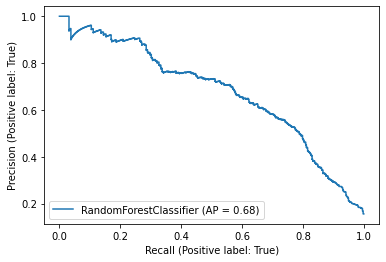

In [36]:

disp = plot_precision_recall_curve(rfc_opt, X_test_scaled, y_test)


Precision (also known as positive predictive value) can be represented as: TP/(TP + FP) where TP is the true positive and FP is false positive. Precision can be thought of as the fraction of positive predictions that actually belong to the positive class.

Recall (also known as sensitivity) can be represented as:TP/(TP+FN) where TP is the number of true positives and FN is the number of false negatives. Recall can be thought of as the fraction of positive predictions out of all positive instances in the data set.

Much like ROC curves, a single value called the AUC-PR can summarize the information in a precision-recall curve and is the area under the (precision-recall) curve. Generally, the higher the AUC-PR score, the better a classifier performs for the given task.  A way to calculate AUC-PR is to calculate the AP, which summarizes a precision-recall curve as the weighted mean of precision achieved across all threshold. 

For this case, it looks like that the Random Forest Classifier performs better on the classification task with an AP score of 0.68. 

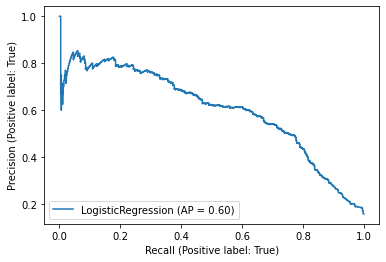

In [58]:
disp2 = plot_precision_recall_curve(log_reg_bal, X_test_scaled, y_test)

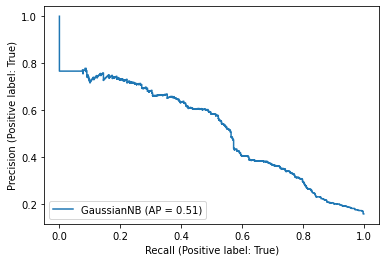

In [59]:
disp3 = plot_precision_recall_curve(gnb, X_test_scaled, y_test)

### SMOTE (Synthetic Minority Oversampling Technique)

Since there are too few examples of the minority class for a model to effectively learn the decision boundary, one way to solve this problem is to oversample the minority examples using synthetic, duplicated samples. This technique is known as SMOTE. This algorithm helps to overcome the overfitting problem posed by random oversampling. These new examples will be
close to existing examples in the feature space, but different in small but random way

In [37]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


In [38]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  

Before OverSampling, counts of label '1': 1431
Before OverSampling, counts of label '0': 7816 



In [39]:
counter = Counter(y)
print(counter)

Counter({False: 10422, True: 1908})


In [40]:
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train_scaled, y_train)

In [41]:
#After resampling
counter = Counter(y_train_smt)
print(counter)

Counter({False: 7816, True: 7816})


In [42]:
log_reg= LogisticRegression()
log_reg.fit(X_train_smt, y_train_smt)
y_pred=log_reg.predict(X_test_scaled)

print("Basic Logistic Regression model recall:", round(metrics.recall_score(y_test, y_pred)*100,2))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test, y_pred))

Basic Logistic Regression model recall: 68.97
              precision    recall  f1-score   support

       False       0.94      0.90      0.92      2606
        True       0.55      0.69      0.61       477

    accuracy                           0.86      3083
   macro avg       0.74      0.79      0.76      3083
weighted avg       0.88      0.86      0.87      3083

col_0    False  True 
Revenue              
False     2333    273
True       148    329


Feature: Administrative Score: 0.28832477117517935
Feature: Administrative_Duration Score: 0.11616704654811544
Feature: Informational Score: -0.025608958077423718
Feature: Informational_Duration Score: -0.7892673433501308
Feature: ProductRelated Score: 2.221314853586027
Feature: ProductRelated_Duration Score: -0.2929526392310204
Feature: BounceRates Score: 0.10690484741059728
Feature: ExitRates Score: -0.024634884963764717


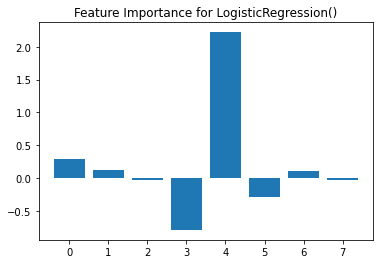

['Administrative',
 'Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates']

In [43]:
feature_importances(log_reg)

Compared to the initial modeling without the oversampling, this model did not result in a major change in result. 

In [44]:
gnb = GaussianNB() 
gnb.fit(X_train_smt, y_train_smt) 

# Make prediction using our test data and model
y_pred = gnb.predict(X_test_scaled) 

# Comparing our prediction to response values
print("Gaussian Naive Bayes model accuracy:", round(metrics.accuracy_score(y_test, y_pred)*100,2))
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

Gaussian Naive Bayes model accuracy: 49.76
              precision    recall  f1-score   support

       False       0.95      0.43      0.59      2606
        True       0.22      0.87      0.35       477

    accuracy                           0.50      3083
   macro avg       0.58      0.65      0.47      3083
weighted avg       0.83      0.50      0.55      3083

col_0    False  True 
Revenue              
False     1120   1486
True        63    414


This is an interesting result because the model accurately classified the true labels as true (87%) but it performed not as well with the false labels.

Overall, SMOTE does not seem to be improving the models. 


### Conclusion

By comparing the various models, the best model seems to the basic logistic regression model that gives heavier weights on the minority class. Adding in the balanced parameter improved the recall score for positive labels from 35% to 65%, while still being accurate for the negative labels. The f1 score for majority class was 0.92 and 0.61 for the minority. This is much better than any of the other models. Even after oversampling the minority class using SMOTE, the results of the logistic regression model hardly changed at all. Even though the accurcy score does not matter a great deal in this case, it was 86%. 


In order to see if there was an improvement in all of the models, the least important features were removed and the models were rerun. The results did not change drastically unfortunately.The graph of the feature importances showed that the most important feature in the models was PageValues, which is the average value for a page that a user visited before landing on the goal page or completing an ecommerce transaction. Analyzing the Page Value gives insights in a business's marketing campaigns since they can use it to optimize conversion and this generate more revenue. 

If pages that are meant to sell or convert have a low page value but recieve high traffic volume, something is going terribly wrong and changes needs to be made on the content and usability of those pages. If you see that pages you’re not actively using in your strategy have a high Page Value but low traffic, the retailer might want to consider adding that page to your strategy to boost the overall conversion rate since it's driving people away from completing the transaction. 

